Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

 Output: Number of predicted wins (W)

In [56]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")



In [3]:
#Loading data
#Loaded .csv file and converted to dataframe.
df=pd.read_csv("Baseball_CaseStudy_dataset.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
#Changing the position of Column "W" to last position 
column_names = ["R","AB","H","2B","3B","HR","BB","SO","SB","RA","ER","ERA","CG","SHO","SV","E","W"]
df = df.reindex(columns=column_names)
df

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [5]:
#Checking column names.Renaming columns for a better understanding  of data .
df.columns=['Number of predicted wins (W)','Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks by batters', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Earned Run Average (ERA)', 'Complete Games','Shutouts', 'Saves','Errors'] 
df

,Number of predicted wins (W),Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks by batters,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [6]:
# Name of the columns
df.columns

Index(['Number of predicted wins (W)', 'Runs', 'At Bats', 'Hits', 'Doubles',
       'Triples', 'Homeruns', 'Walks by batters', 'Strikeouts', 'Stolen Bases',
       'Runs Allowed', 'Earned Runs', 'Earned Run Average (ERA)',
       'Complete Games', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

In [7]:
#Checking shape
df.shape
#There are 30 rows and 17 columns


(30, 17)

In [8]:
#checking the datatype of each column 
print(df.dtypes)

Number of predicted wins (W)      int64
Runs                              int64
At Bats                           int64
Hits                              int64
Doubles                           int64
Triples                           int64
Homeruns                          int64
Walks by batters                  int64
Strikeouts                        int64
Stolen Bases                      int64
Runs Allowed                      int64
Earned Runs                     float64
Earned Run Average (ERA)          int64
Complete Games                    int64
Shutouts                          int64
Saves                             int64
Errors                            int64
dtype: object


There are 30 rows and 17 columns in our dataset.

In [9]:
#Information of the database
df.info

<bound method DataFrame.info of     Number of predicted wins (W)  Runs  At Bats  Hits  Doubles  Triples  \
0                            724  5575     1497   300       42      139   
1                            696  5467     1349   277       44      156   
2                            669  5439     1395   303       29      141   
3                            622  5533     1381   260       27      136   
4                            689  5605     1515   289       49      151   
5                            891  5509     1480   308       17      232   
6                            764  5567     1397   272       19      212   
7                            713  5485     1370   246       20      217   
8                            644  5485     1383   278       32      167   
9                            748  5640     1495   294       33      161   
10                           751  5511     1419   279       32      172   
11                           729  5459     1363   278       26      

Attribute Information:

R =Runs

AB=At Bats

H=Hits

2B=Doubles

3B=Triples

HR=Homeruns

BB=Walks

SO=Strikeouts

SB=Stolen Bases

RA=Runs Allowed

ER=Earned Runs

ERA=Earned Run Average

SHO=Shutouts

SV=Saves

E=Errors

W= Number of Predicted Wins(OUTPUT VARIABLE)

In [10]:
#Statistical info of the data.
df.describe().T

# Assuming no null values in data as count is constant.

,count,mean,std,min,25%,50%,75%,max
Number of predicted wins (W),30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
Runs,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
At Bats,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Hits,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Doubles,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Triples,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Homeruns,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Walks by batters,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Strikeouts,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00
Stolen Bases,30.0,688.233333,72.108005,525.00,636.2500,695.500,732.50,844.00


# EDA (Exploratory Data Analysis)

In [11]:
#finding null values in the database
df.isnull().sum()

Number of predicted wins (W)    0
Runs                            0
At Bats                         0
Hits                            0
Doubles                         0
Triples                         0
Homeruns                        0
Walks by batters                0
Strikeouts                      0
Stolen Bases                    0
Runs Allowed                    0
Earned Runs                     0
Earned Run Average (ERA)        0
Complete Games                  0
Shutouts                        0
Saves                           0
Errors                          0
dtype: int64

There is no null values in the dataset

<AxesSubplot:>

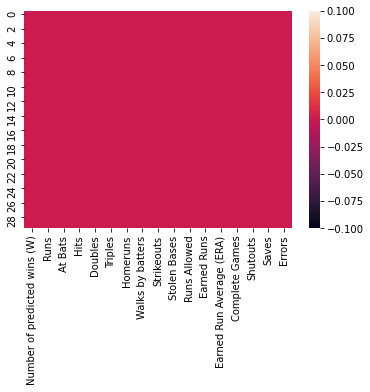

In [12]:
#Making Heatmap of null values
sns.heatmap(df.isnull())

In [13]:
#Finding Correlation of the variables
df.corr()

,Number of predicted wins (W),Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks by batters,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
Number of predicted wins (W),1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.430751
Runs,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.087947
At Bats,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.037612
Hits,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.427797
Doubles,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
Triples,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.307407
Homeruns,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.484342
Walks by batters,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.111850
Strikeouts,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
Stolen Bases,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996,-0.812952


<AxesSubplot:>

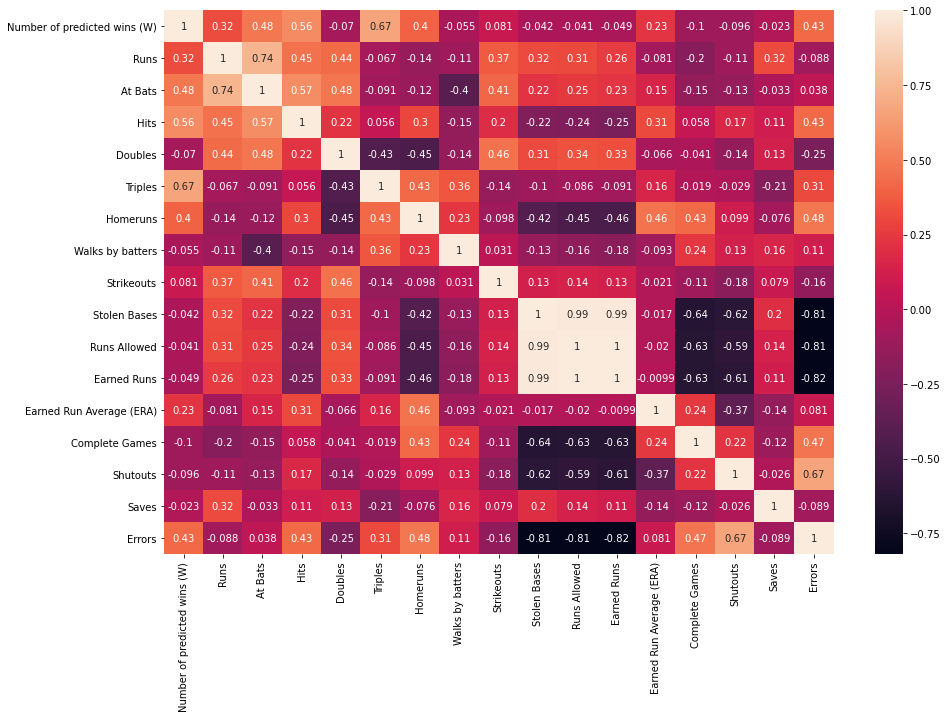

In [14]:
# Making Heatmap of correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# Univariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '44'),
  Text(1, 0, '51'),
  Text(2, 0, '52'),
  Text(3, 0, '57'),
  Text(4, 0, '59'),
  Text(5, 0, '63'),
  Text(6, 0, '68'),
  Text(7, 0, '69'),
  Text(8, 0, '70'),
  Text(9, 0, '71'),
  Text(10, 0, '78'),
  Text(11, 0, '82'),
  Text(12, 0, '83'),
  Text(13, 0, '84'),
  Text(14, 0, '86'),
  Text(15, 0, '87'),
  Text(16, 0, '88'),
  Text(17, 0, '93'),
  Text(18, 0, '95'),
  Text(19, 0, '97'),
  Text(20, 0, '98'),
  Text(21, 0, '101'),
  Text(22, 0, '104'),
  Text(23, 0, '112'),
  Text(24, 0, '121'),
  Text(25, 0, '132'),
  Text(26, 0, '134')])

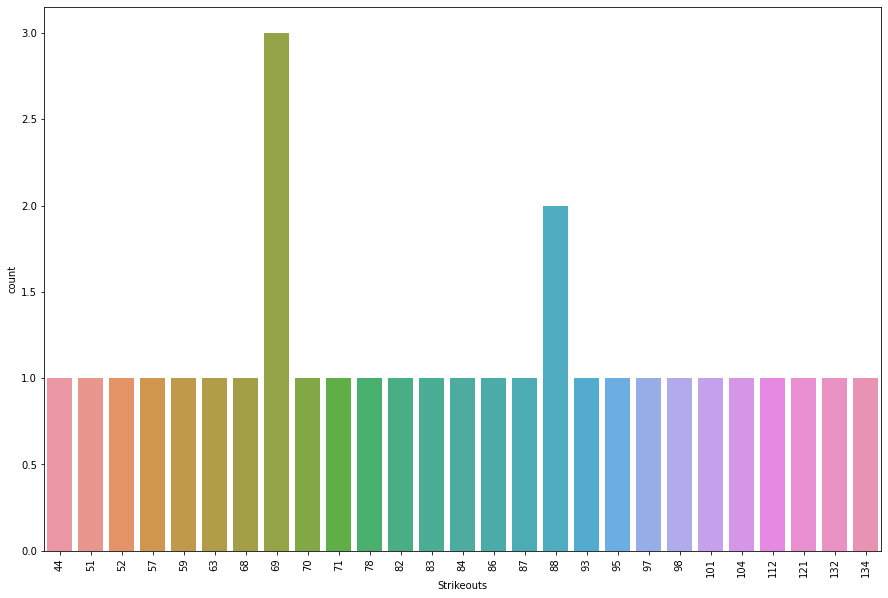

In [15]:
#Plotting no of stikeouts
plt.figure(figsize=(15,10))
sns.countplot(df.Strikeouts)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Runs', ylabel='count'>

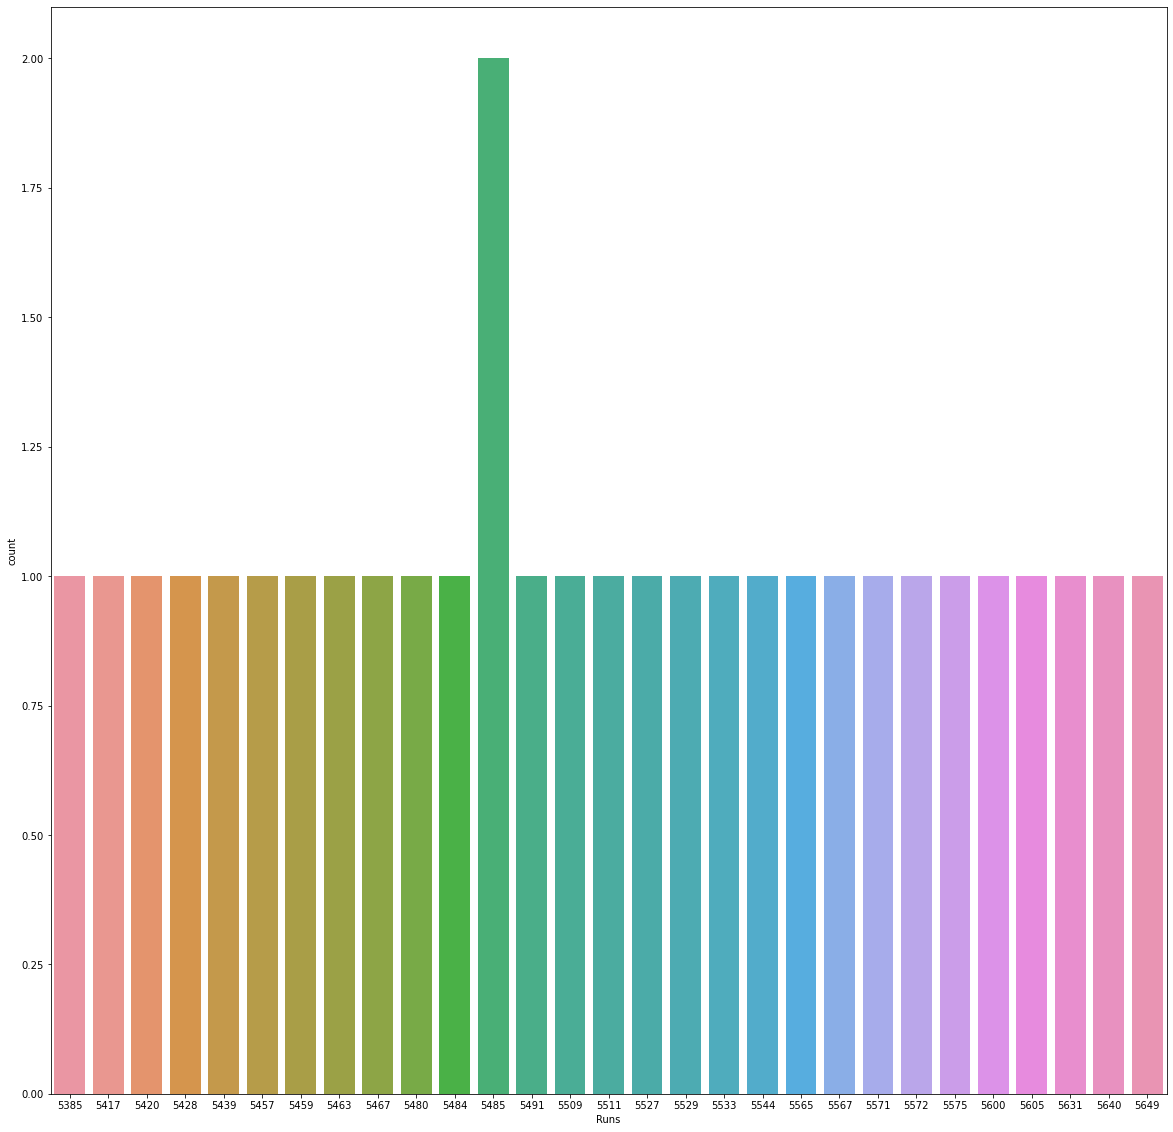

In [16]:
#Ploting count of no of Runs
plt.figure(figsize=(20,20))
sns.countplot(df.Runs)

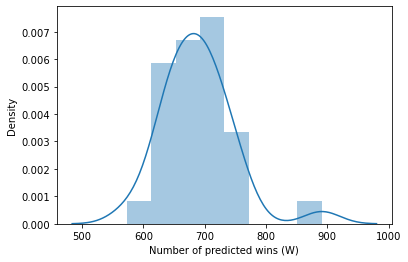

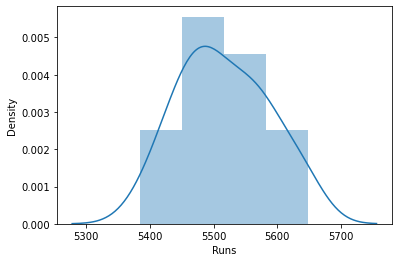

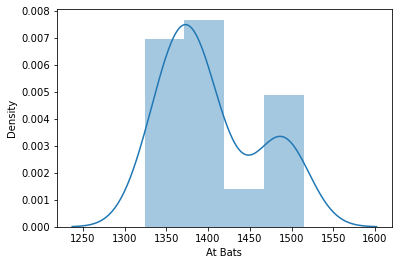

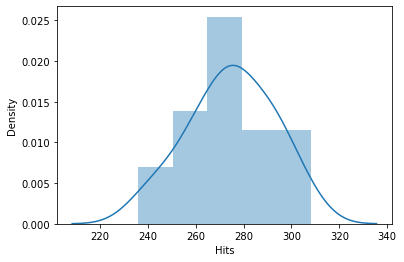

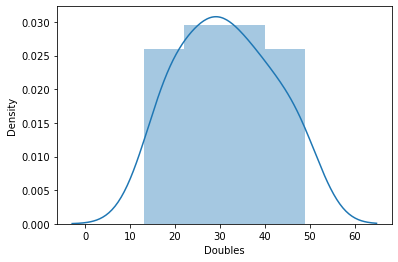

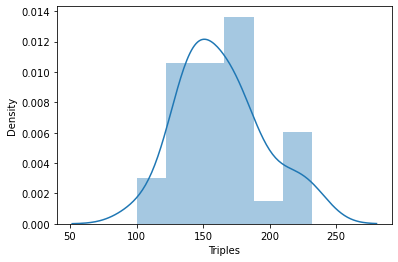

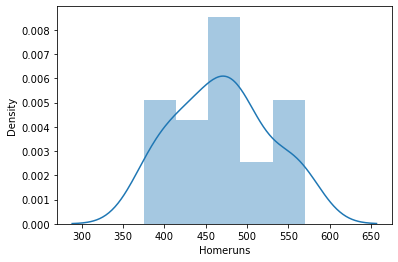

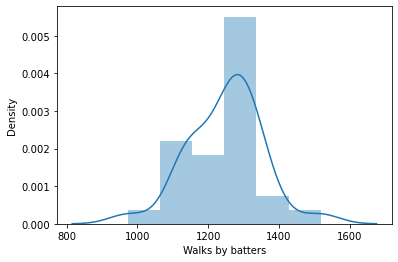

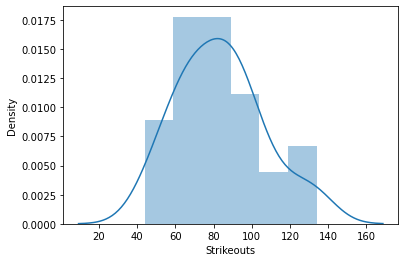

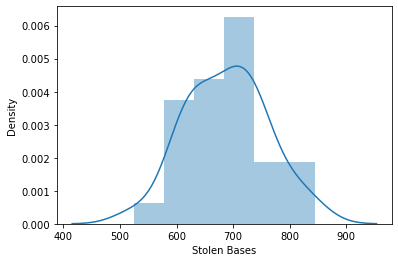

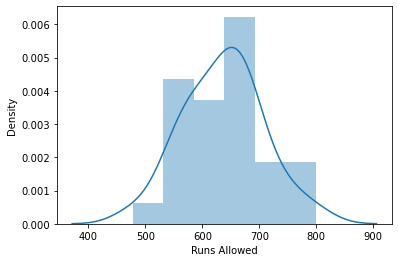

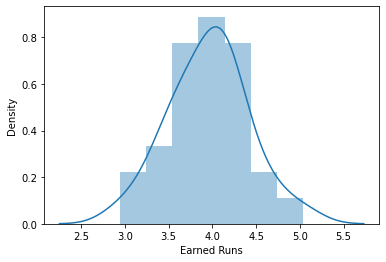

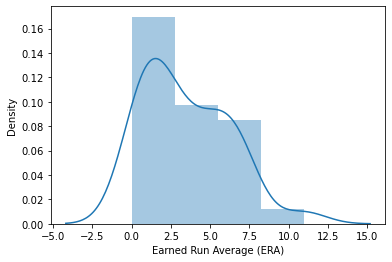

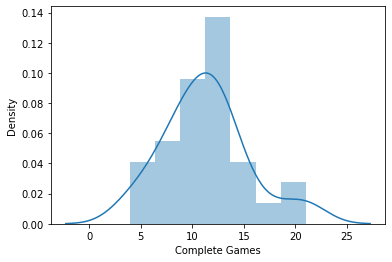

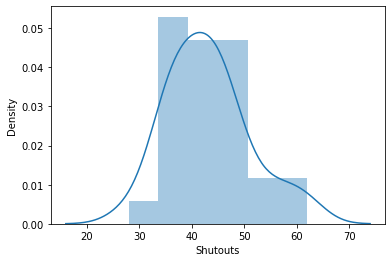

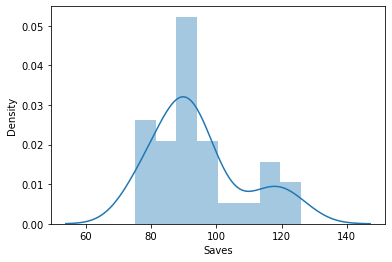

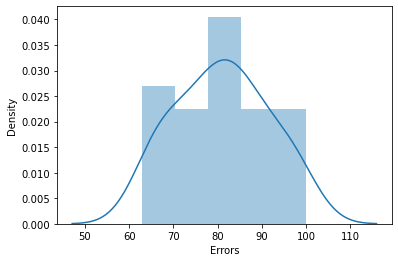

In [17]:
#checking wheather the columns are normally distributed or not
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()
#From below observation we can say that R,CG,H,SO,SHO,SV,E are skewed..rest are normally distributed

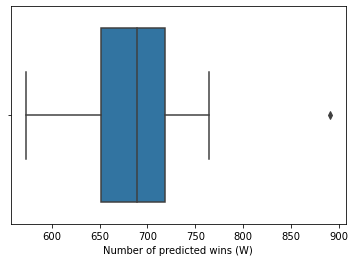

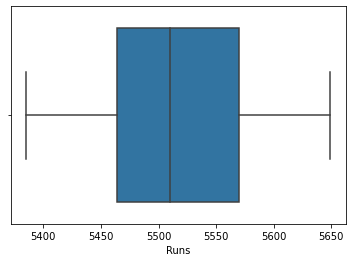

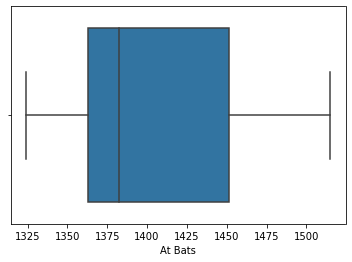

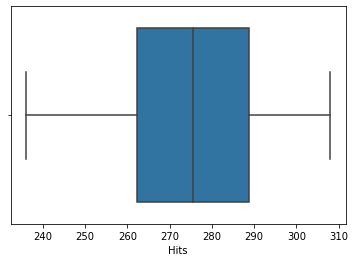

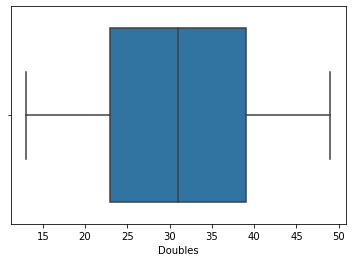

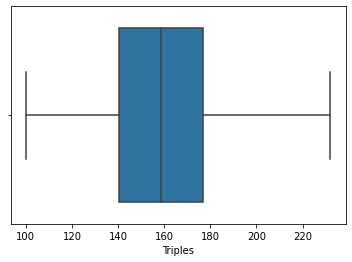

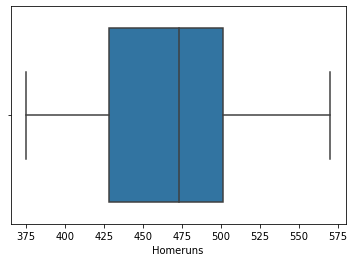

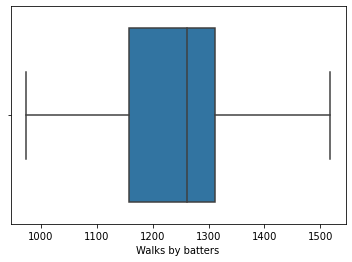

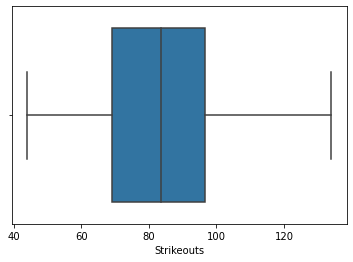

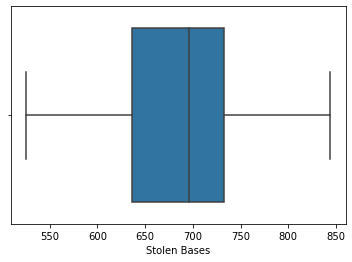

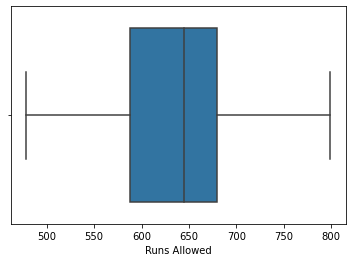

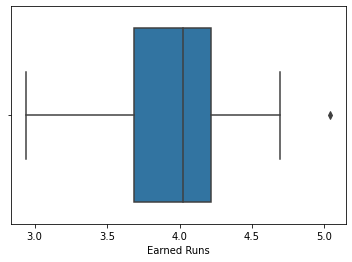

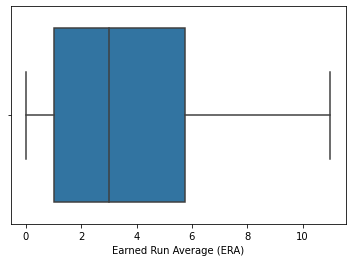

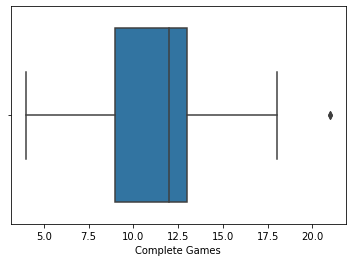

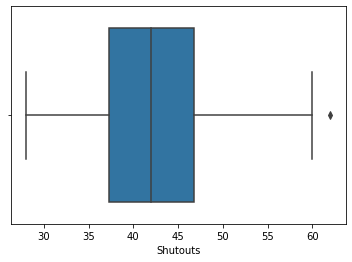

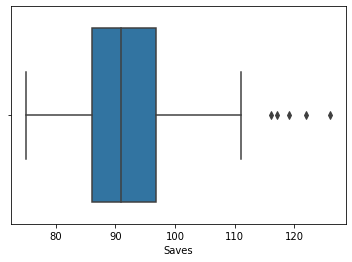

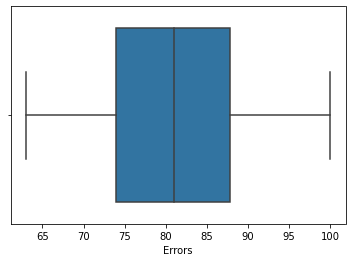

In [18]:
# Cheacking whether the columns has outliers or not
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()
#From below observation we can see that R,ERA,SHA,SV,E has some outlies

{'bodies': [<matplotlib.collections.PolyCollection at 0x2686e21ab50>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2686e21a9a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2686e21aa00>,
 'cbars': <matplotlib.collections.LineCollection at 0x2686e1f4340>}

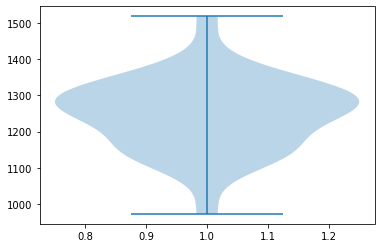

In [19]:
#Making voilinplot of BB
plt.violinplot(df["Walks by batters"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2686e239550>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2686e239370>,
 'cmins': <matplotlib.collections.LineCollection at 0x2686e239400>,
 'cbars': <matplotlib.collections.LineCollection at 0x2686e239a00>}

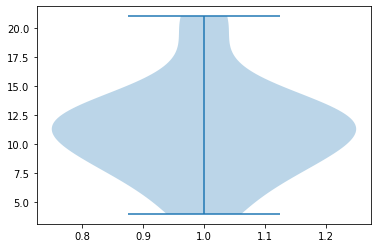

In [20]:
#Making voilinplot of CG
plt.violinplot(df["Complete Games"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2686e5b8700>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2686e5b8520>,
 'cmins': <matplotlib.collections.LineCollection at 0x2686e5b8580>,
 'cbars': <matplotlib.collections.LineCollection at 0x2686e5b8bb0>}

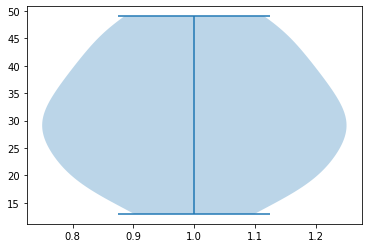

In [21]:
#Making voilinplot of Doubles
plt.violinplot(df["Doubles"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2686e34fe20>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2686e34fc40>,
 'cmins': <matplotlib.collections.LineCollection at 0x2686e398310>,
 'cbars': <matplotlib.collections.LineCollection at 0x2686e398610>}

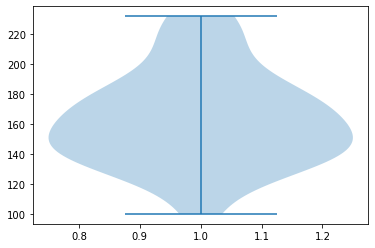

In [22]:
#Making voilinplot of Triples
plt.violinplot(df["Triples"])

# Bivariate Analysis

<AxesSubplot:xlabel='Runs Allowed', ylabel='Number of predicted wins (W)'>

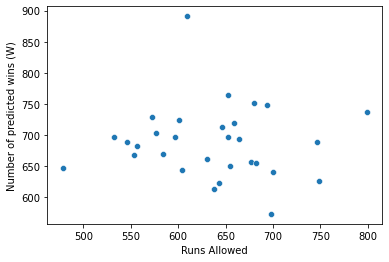

In [23]:
# From below observation we can say that RA is negatively related to W
sns.scatterplot(x="Runs Allowed",y="Number of predicted wins (W)",data=df)

<AxesSubplot:xlabel='Earned Runs', ylabel='Number of predicted wins (W)'>

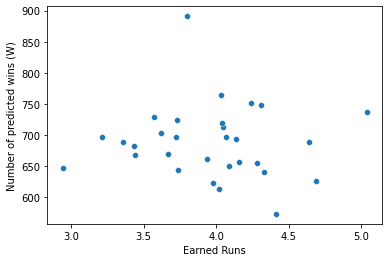

In [24]:
#Making Scatterplot between wins and Earned Runs.

sns.scatterplot(x="Earned Runs",y="Number of predicted wins (W)",data=df)
# From below observation we can say that ER is negatively related to W

<AxesSubplot:xlabel='Earned Run Average (ERA)', ylabel='Number of predicted wins (W)'>

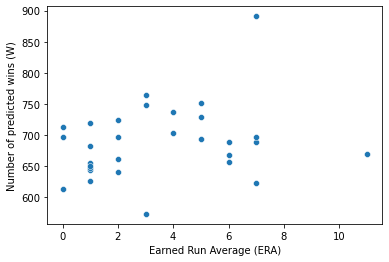

In [25]:
# From below observation we can say that ERA is negatively related to W
sns.scatterplot(x="Earned Run Average (ERA)",y="Number of predicted wins (W)",data=df)
#Conclusion:- Showing negative relationship between two variables

<AxesSubplot:xlabel='Shutouts', ylabel='Number of predicted wins (W)'>

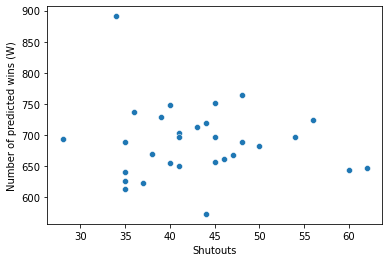

In [26]:
sns.scatterplot(x="Shutouts",y="Number of predicted wins (W)",data=df)

<AxesSubplot:xlabel='Hits', ylabel='Number of predicted wins (W)'>

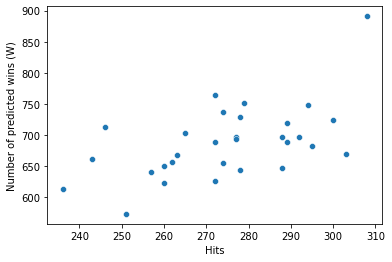

In [27]:

#Making Scatterplot between Hits and Number of predicted wins (W)
sns.scatterplot(x="Hits" ,y="Number of predicted wins (W)", data=df)
#conclusion :- Scatterplot showing No relation between Wins and Hits.

<AxesSubplot:xlabel='Errors', ylabel='Number of predicted wins (W)'>

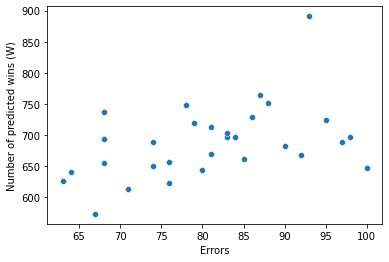

In [28]:
#Making Scatterplot between wins and Errors.
sns.scatterplot(x="Errors" ,y="Number of predicted wins (W)", data=df)

<AxesSubplot:xlabel='Shutouts', ylabel='Number of predicted wins (W)'>

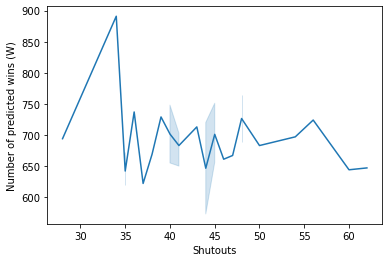

In [29]:
#MaWking lineplot between Shutouts and Number OF pREDICTED Wins(W)
sns.lineplot(x="Shutouts",y="Number of predicted wins (W)",data=df)

<AxesSubplot:xlabel='Earned Run Average (ERA)', ylabel='Number of predicted wins (W)'>

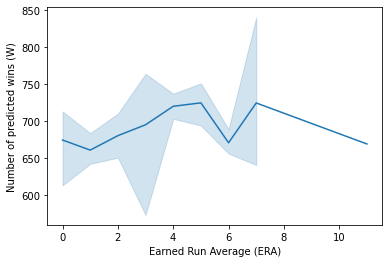

In [30]:
#MaWking lineplot between Eearned Run Average and Number OF pREDICTED Wins(W)
sns.lineplot(x="Earned Run Average (ERA)",y="Number of predicted wins (W)",data=df)

<AxesSubplot:xlabel='Doubles', ylabel='Number of predicted wins (W)'>

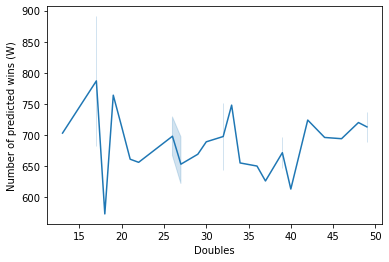

In [31]:
#MaWking lineplot between Doubles and Number OF pREDICTED Wins(W)
sns.lineplot(x="Doubles",y="Number of predicted wins (W)",data=df)

<AxesSubplot:xlabel='Homeruns', ylabel='Number of predicted wins (W)'>

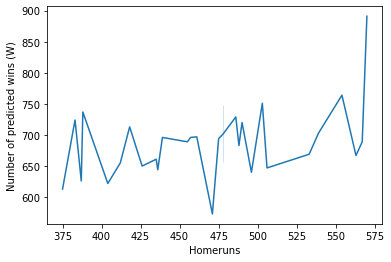

In [32]:
#MaWking lineplot between Homeruns and Number OF pREDICTED Wins(W)
sns.lineplot(x="Homeruns",y="Number of predicted wins (W)",data=df)

<AxesSubplot:xlabel='Complete Games', ylabel='Number of predicted wins (W)'>

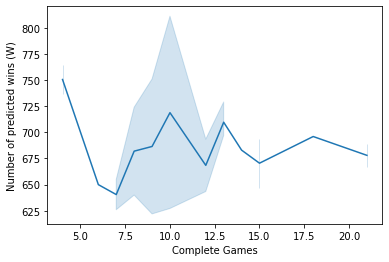

In [33]:
#MaWking lineplot between Complete Games and Number OF pREDICTED Wins(W)
sns.lineplot(x="Complete Games",y="Number of predicted wins (W)",data=df)

<AxesSubplot:xlabel='Runs', ylabel='Number of predicted wins (W)'>

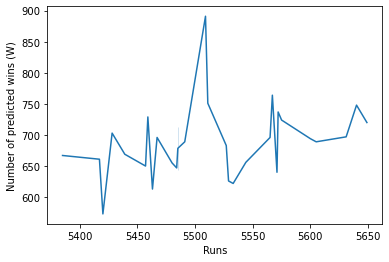

In [34]:
#Making Lineplot between Runs and wins .
sns.lineplot(x="Runs",y="Number of predicted wins (W)" ,data=df)

<AxesSubplot:xlabel='Complete Games', ylabel='Number of predicted wins (W)'>

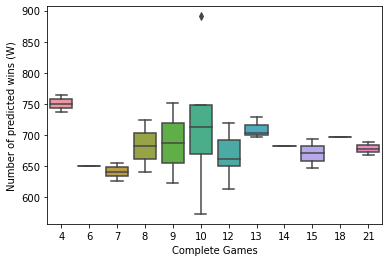

In [35]:
sns.boxplot(x='Complete Games',y='Number of predicted wins (W)',data=df)

<AxesSubplot:xlabel='Shutouts', ylabel='Number of predicted wins (W)'>

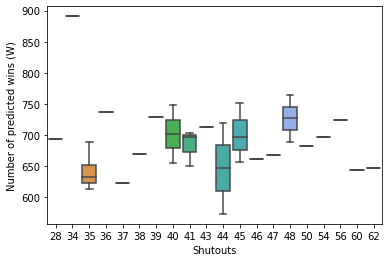

In [36]:
sns.boxplot(x='Shutouts',y='Number of predicted wins (W)',data=df)

# Multivariate Analysis

array([[<AxesSubplot:title={'center':'Number of predicted wins (W)'}>,
        <AxesSubplot:title={'center':'Runs'}>,
        <AxesSubplot:title={'center':'At Bats'}>,
        <AxesSubplot:title={'center':'Hits'}>],
       [<AxesSubplot:title={'center':'Doubles'}>,
        <AxesSubplot:title={'center':'Triples'}>,
        <AxesSubplot:title={'center':'Homeruns'}>,
        <AxesSubplot:title={'center':'Walks by batters'}>],
       [<AxesSubplot:title={'center':'Strikeouts'}>,
        <AxesSubplot:title={'center':'Stolen Bases'}>,
        <AxesSubplot:title={'center':'Runs Allowed'}>,
        <AxesSubplot:title={'center':'Earned Runs'}>],
       [<AxesSubplot:title={'center':'Earned Run Average (ERA)'}>,
        <AxesSubplot:title={'center':'Complete Games'}>,
        <AxesSubplot:title={'center':'Shutouts'}>,
        <AxesSubplot:title={'center':'Saves'}>],
       [<AxesSubplot:title={'center':'Errors'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

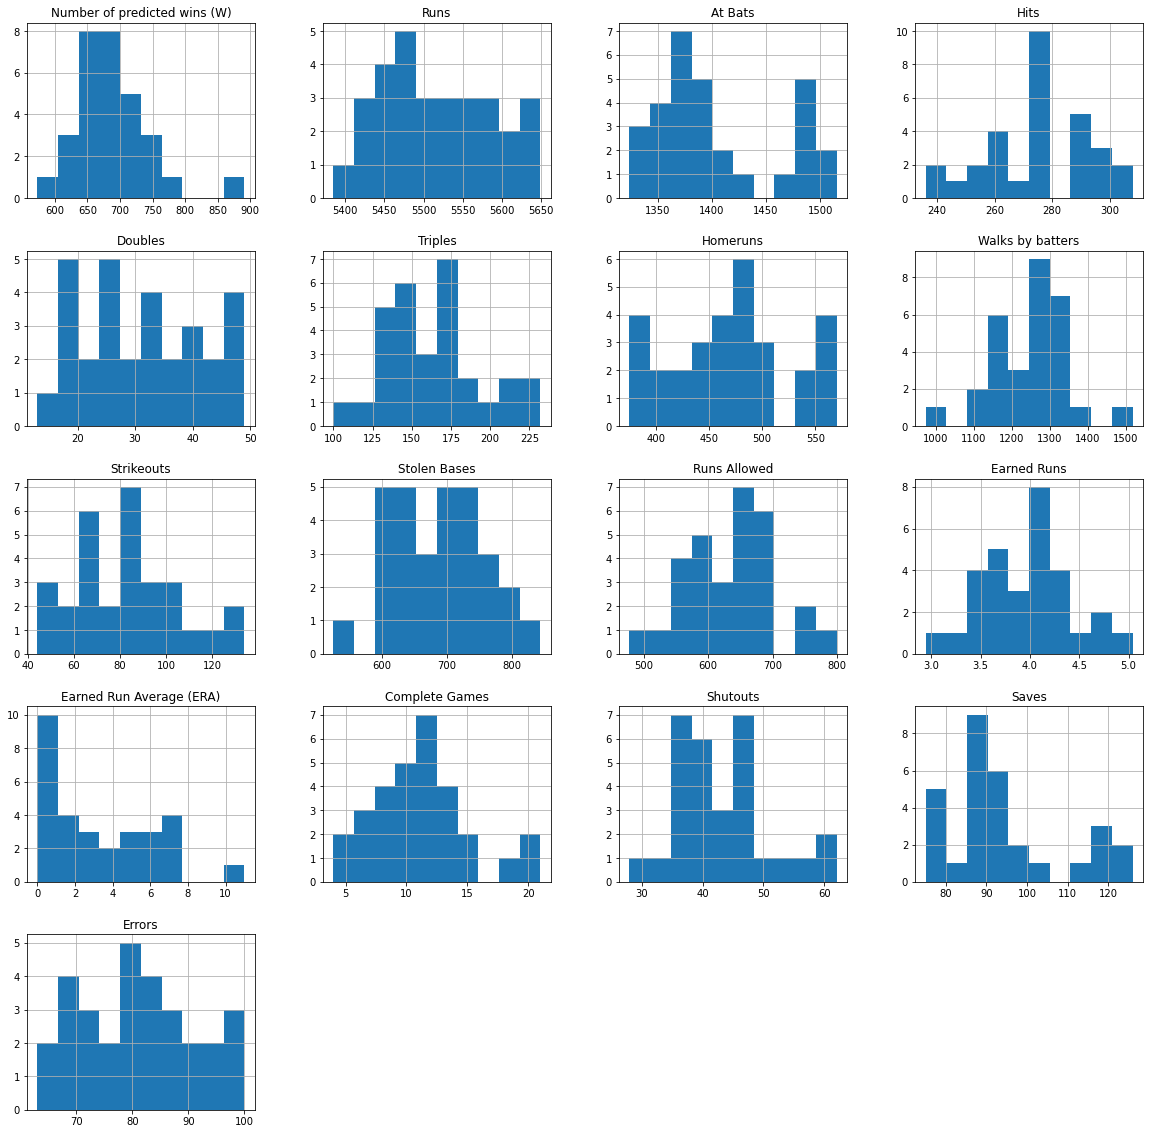

In [37]:
df.hist(figsize=(20,20))

Number of predicted wins (W)        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Runs                             AxesSubplot(0.285345,0.71587;0.133621x0.16413)
At Bats                           AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Hits                             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Doubles                          AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Triples                            AxesSubplot(0.125,0.518913;0.133621x0.16413)
Homeruns                        AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Walks by batters                 AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Strikeouts                      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Stolen Bases                    AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Runs Allowed                       AxesSubplot(0.125,0.321957;0.133621x0.16413)
Earned Runs                     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Earned Run Average (ERA)         AxesSub

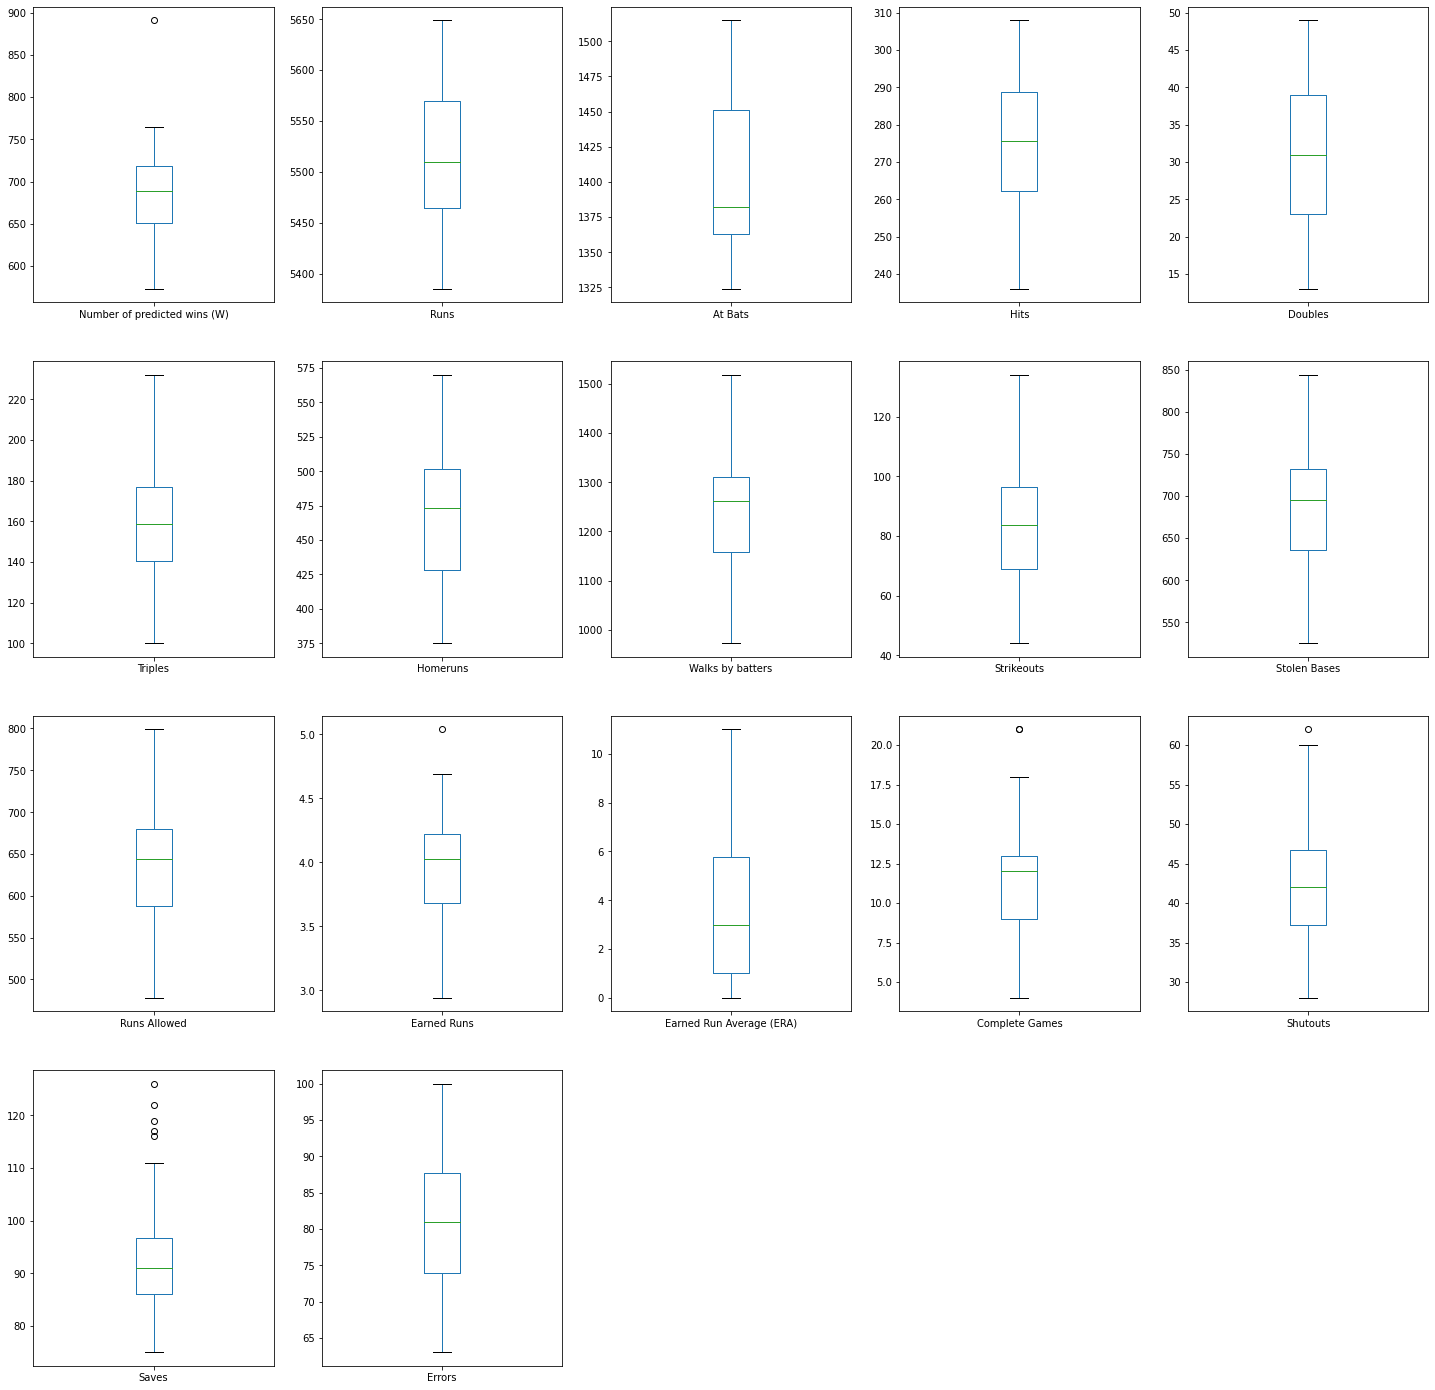

In [38]:
# Making Boxplot of all variables 
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(25,25))

<Figure size 1080x720 with 0 Axes>

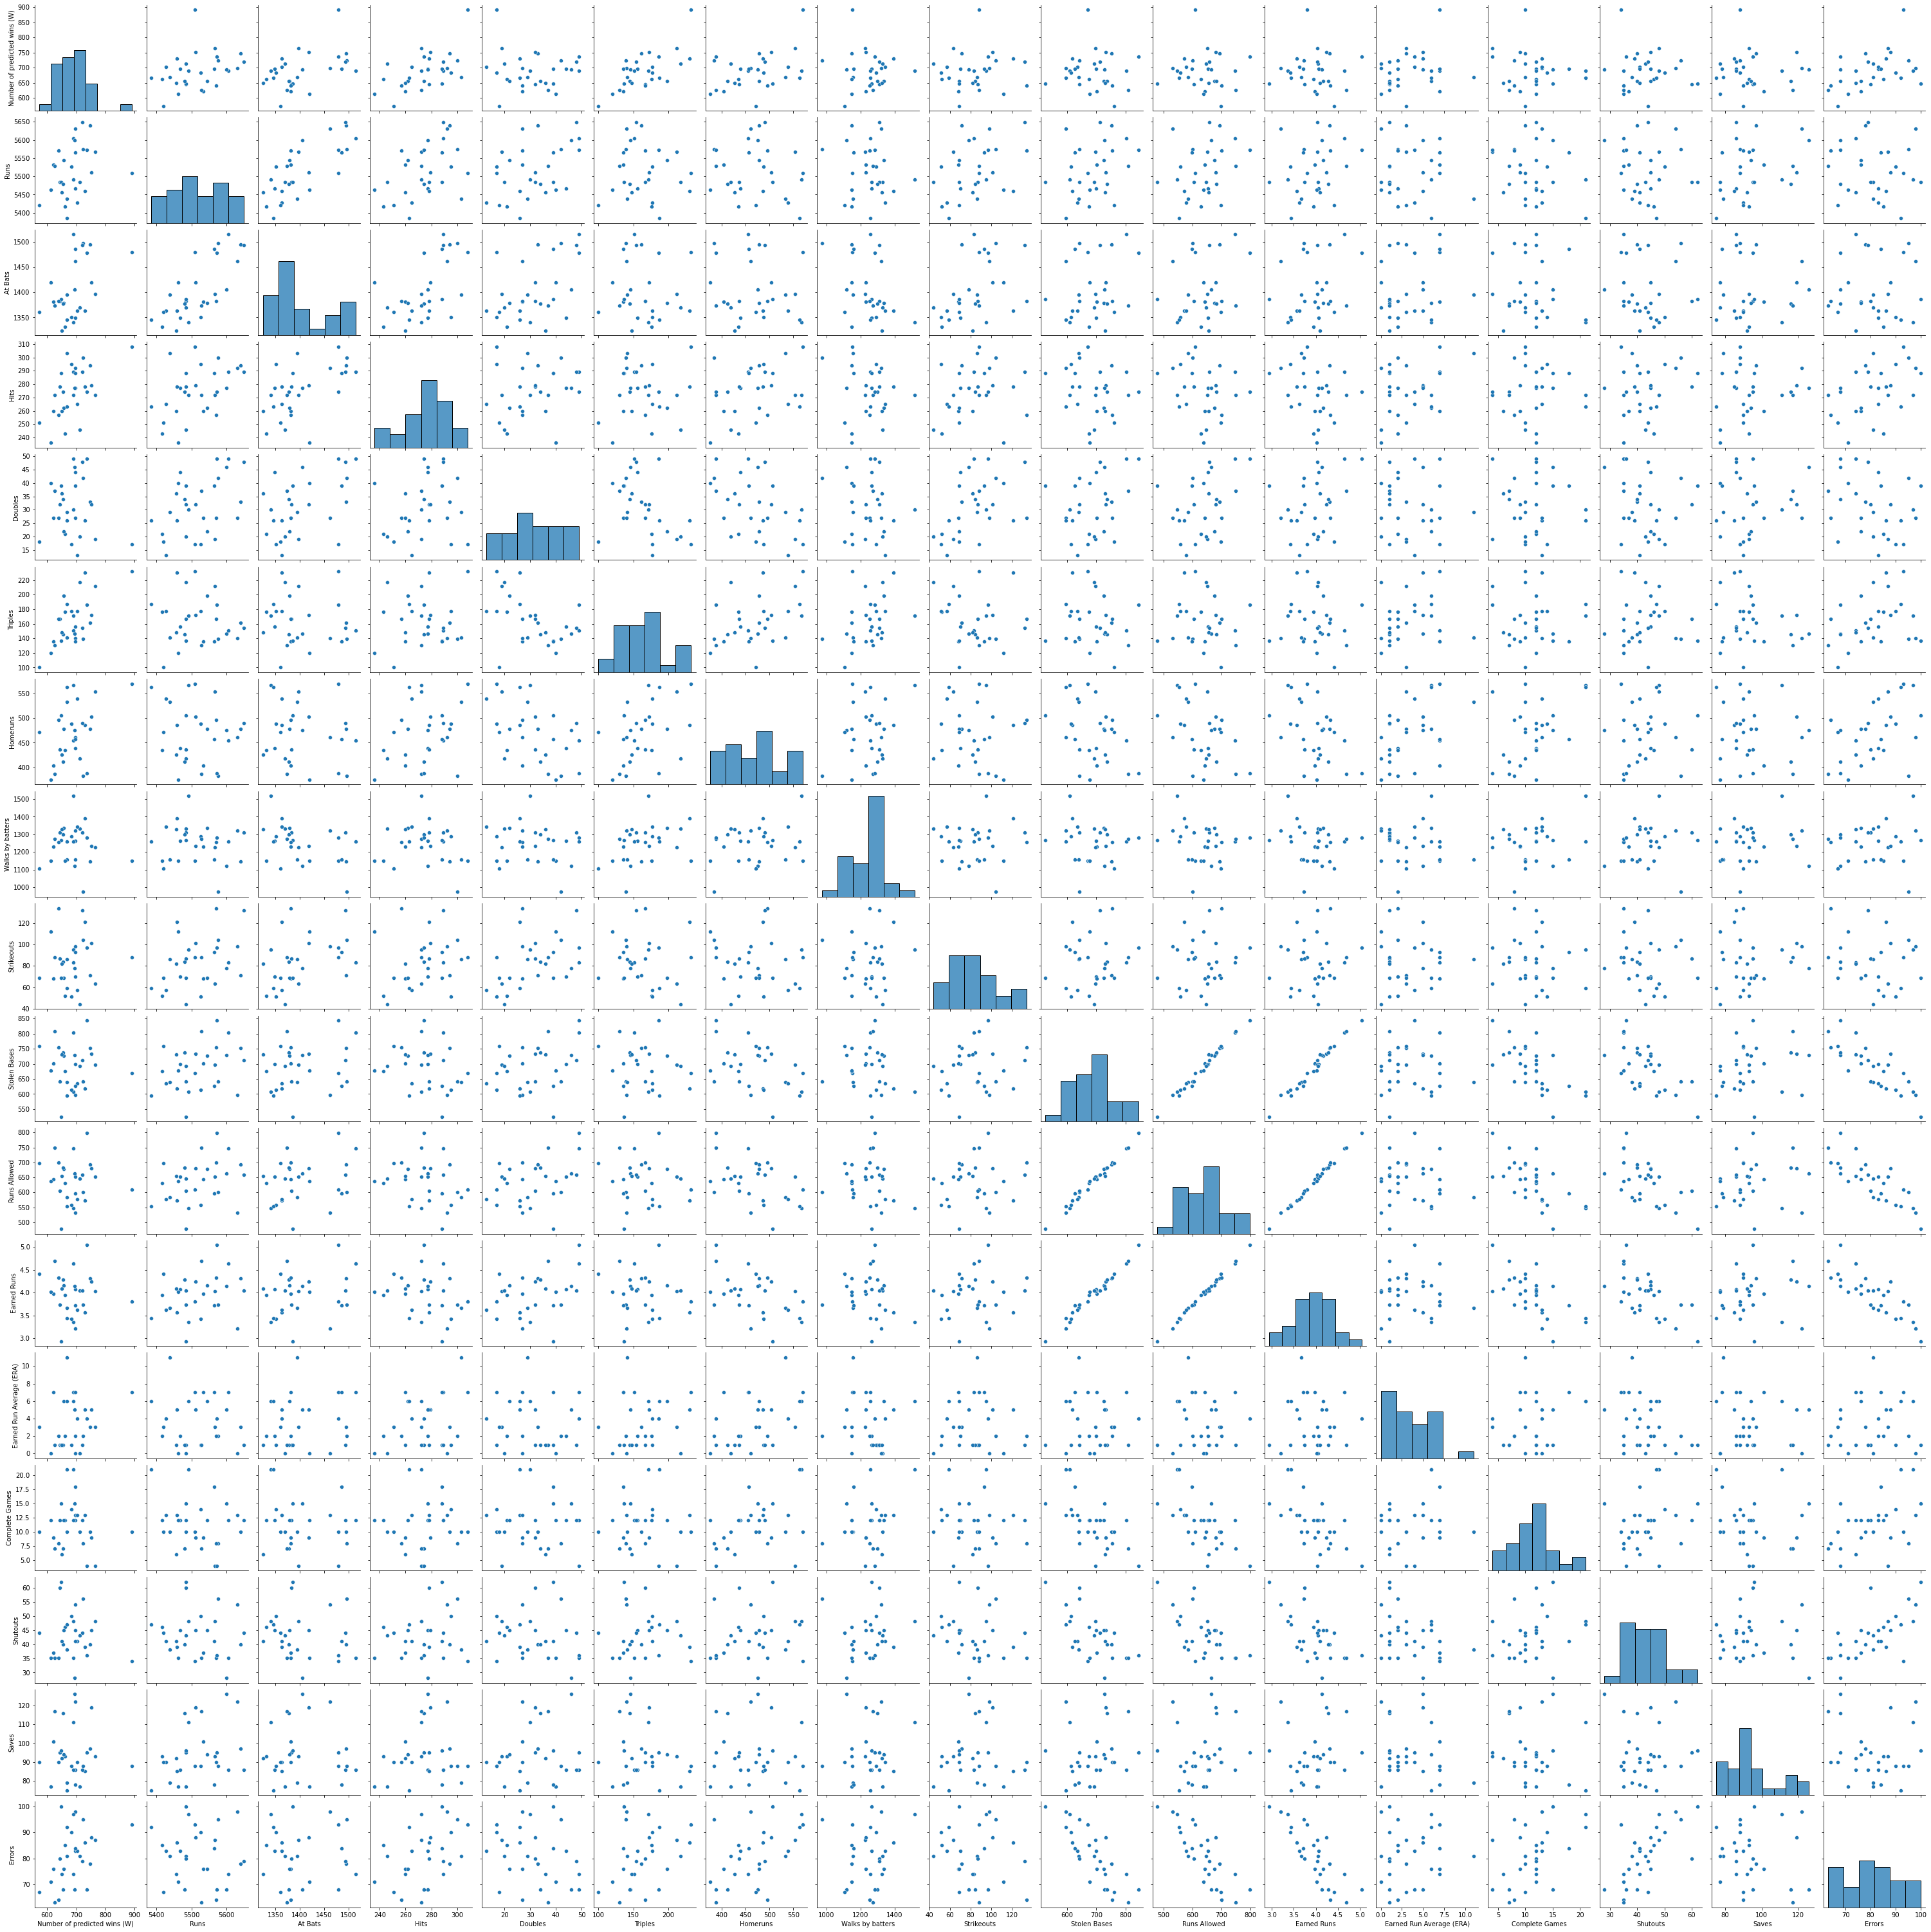

In [39]:
# Making Pairplot
plt.figure(figsize=(15,10))
sns.pairplot(df)

# Statistical Analysis¶

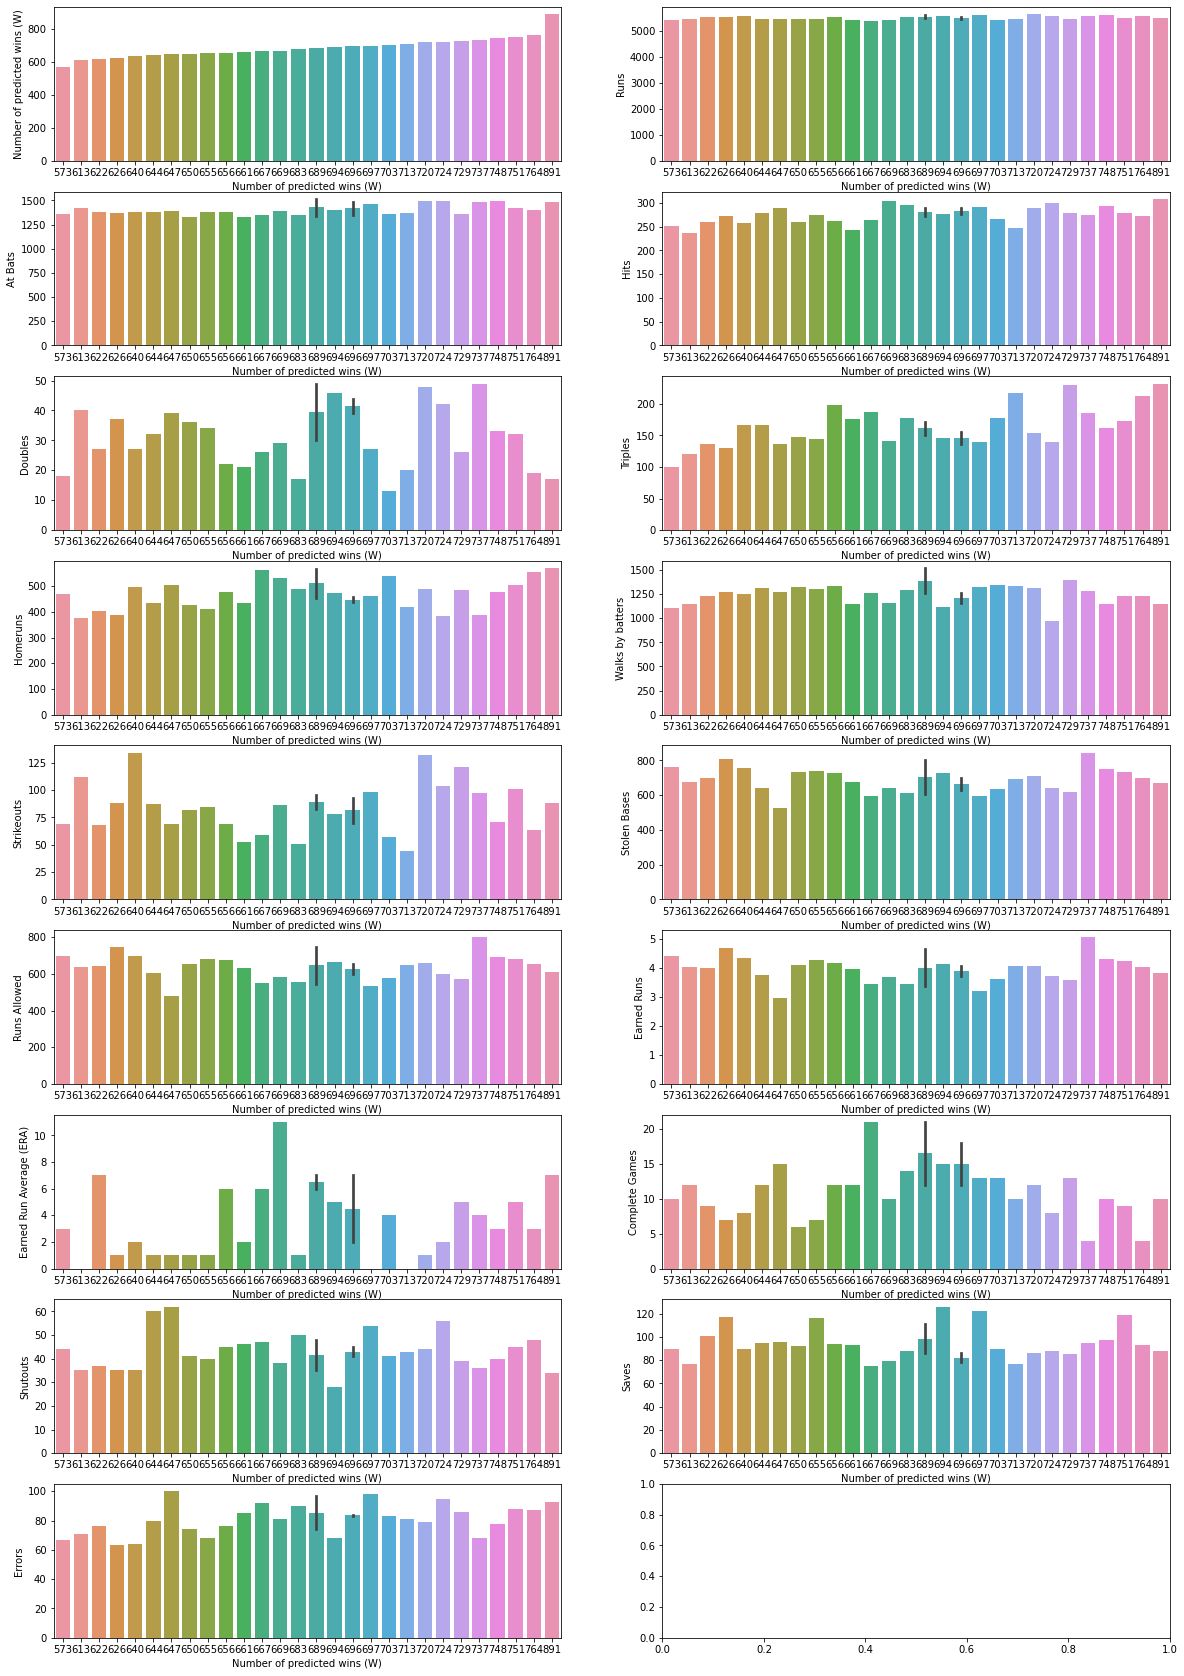

In [40]:
# Lets analyse the relation between target variable and other variables.
fig,ax= plt.subplots(ncols=2,nrows=9,figsize=(20,30))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.barplot(x='Number of predicted wins (W)', y=col , data=df, ax=ax[index])
        index+=1

In [41]:
#describe funtion
df.describe()

,Number of predicted wins (W),Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks by batters,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


<function matplotlib.pyplot.show(close=None, block=None)>

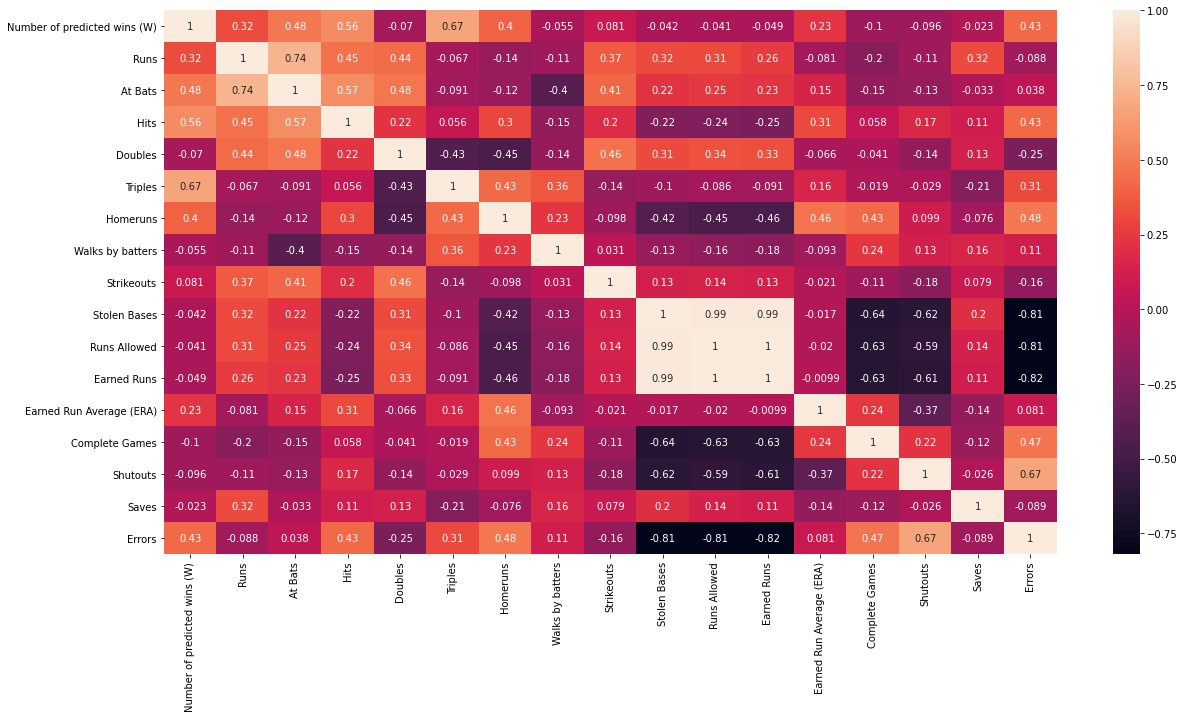

In [42]:
#Observing corelation between the columns through heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show

In [43]:
df.corr()

,Number of predicted wins (W),Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks by batters,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
Number of predicted wins (W),1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.430751
Runs,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.087947
At Bats,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.037612
Hits,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.427797
Doubles,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
Triples,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.307407
Homeruns,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.484342
Walks by batters,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.111850
Strikeouts,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
Stolen Bases,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996,-0.812952


# Removing outliers and Skewness

In [44]:
print("The shape before removing outliers and skewness",df.shape)
print("skewness before removing outliers")
print(df.skew())
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print("New shape after removing outliers",df1.shape)
print("skewness after removing outliers")
print(df1.skew())

The shape before removing outliers and skewness (30, 17)
skewness before removing outliers
Number of predicted wins (W)    1.200786
Runs                            0.183437
At Bats                         0.670254
Hits                           -0.230650
Doubles                         0.129502
Triples                         0.516441
Homeruns                        0.158498
Walks by batters               -0.156065
Strikeouts                      0.479893
Stolen Bases                    0.045734
Runs Allowed                    0.058710
Earned Runs                     0.053331
Earned Run Average (ERA)        0.736845
Complete Games                  0.565790
Shutouts                        0.657524
Saves                           0.890132
Errors                          0.047089
dtype: float64
New shape after removing outliers (29, 17)
skewness after removing outliers
Number of predicted wins (W)   -0.215364
Runs                            0.169573
At Bats                         0.78377

In [49]:
for i in df.columns:
    if df1.skew().loc[i]>0.55:
        df1[i]=np.log1p(df1[i])

In [50]:
df1.skew()

Number of predicted wins (W)   -0.215364
Runs                            0.169573
At Bats                         0.732868
Hits                           -0.335304
Doubles                         0.090124
Triples                         0.450862
Homeruns                        0.151193
Walks by batters               -0.233815
Strikeouts                      0.494966
Stolen Bases                    0.018155
Runs Allowed                    0.018461
Earned Runs                     0.016693
Earned Run Average (ERA)       -0.275681
Complete Games                  0.526943
Shutouts                        0.109983
Saves                           0.537982
Errors                          0.119013
dtype: float64

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df1))

StandardScaler()


In [52]:
df1.skew()

Number of predicted wins (W)   -0.215364
Runs                            0.169573
At Bats                         0.732868
Hits                           -0.335304
Doubles                         0.090124
Triples                         0.450862
Homeruns                        0.151193
Walks by batters               -0.233815
Strikeouts                      0.494966
Stolen Bases                    0.018155
Runs Allowed                    0.018461
Earned Runs                     0.016693
Earned Run Average (ERA)       -0.275681
Complete Games                  0.526943
Shutouts                        0.109983
Saves                           0.537982
Errors                          0.119013
dtype: float64

### TRAIN TEST SPLIT

In [53]:
#Separating independent and dependent values
y=df['Number of predicted wins (W)']
x=df.drop('Number of predicted wins (W)',axis=1)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=42)

### MODELLING

#### 1. LINEAR REGRESSION

In [57]:
lr= LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, predlr))
print('MSE:', metrics.mean_squared_error(y_test, predlr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predlr)))

MAE: 21.524652680443126
MSE: 557.1374282627469
RMSE: 23.60375877403315


#### 3. DECISION TREE REGRESSOR

In [58]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 58.0
MSE: 3790.0
RMSE: 61.56297588648554


Linear Regressor is having lowest RMSE value

### SAVING THE BEST MODEL

In [59]:
import pickle
# save the model to disk
filename = 'best_model_lr.pkl'
pickle.dump(lr,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([695.04078022, 669.00079998, 554.45171707, 673.34914446,
       604.26747952, 739.74376262])